Bibliotecas utilizadas no projeto:

    - %pip install pandas
    - %pip install numpy
    - %pip install matplotlib
    - %pip install ydata-profiling
    - %pip install scikit-learn


# IMPORTANDO DADOS

In [1]:
# Importando a biblioteca pandas, no qual usaremos para manipular os nossos dados:
import pandas as pd

# Importando a base de dados do Kaggle: ("https://www.kaggle.com/datasets/fatihyavuzz/studentperformancefactors"):
dataset = pd.read_csv("StudentPerformanceFactors.csv")

# Visualizando as cinco primeiras linhas da nossa base de dados:
dataset.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# PREPARANDO DADOS

In [2]:
# Observando detalhadamente cada coluna percebemos que os tipos das colunas estão corretos, mas apresentamos alguns valores vazios nas colunas 11, 16 e 17:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [3]:
# Eliminando valores vazios do nosso DataFrame:
dataset.dropna(inplace=True)

# Visualizando informações sobre nossa base de dados:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [4]:
# Em seguida alteramos os nomes das colunas para facilitar o entendimento e a manipulação do nossos dados:
dataset.columns = ["Horas_Estudo","Presenca","Envolvimento_Pais","Acesso_Recursos",
                   "Atividade_Extracurricular","Horas_Sono","Pontuacao_Anterior",
                   "Nivel_Motivacao","Acesso_Internet","Tutoria","Renda_Familiar","Qualidade_Ensino",
                   "Tipo_Escola","Influencia_Colegas","Atividade_Fisica",
                   "Deficiencia_Aprendizagem","Educacao_Pais","Distancia_EscolaCasa","Genero","Pontuacao_Final"]

# VISUALIZAÇÃO RÁPIDA E IDEIAS DE ANÁLISES

In [ ]:
# Importando método da biblioteca ydata_profiling, no qual gera uma simples análise/resumo das variáveis do nosso DataFrame:
from ydata_profiling import ProfileReport

# Aplicando o relatório sobre a nossa base de dados:
profile = ProfileReport(dataset, title="Relatório Dataset(StudentPerformanceFactors)", explorative=True)

#Visualizando o relatório:
profile

A partir da leitura do nosso relatório, gerado acima, conseguimos observar alguns insights relevantes a serem realizados, como:

  *   Comparar o desempenhos dos participantes de diferentes gêneros no exame.
  *   Análisar a influência das horas de sono no desemepenho dos participantes.
  *   Análisar a influência das horas de estudo no desemepenho dos participantes.
  *   Entender e comparar o desempenho dos participantes de tipos de ensinos diferentes.   
  *   Verificar se realmente a presença nas aulas influência no desempenho do aluno.
  *   Análisar o desempenho de participantes com niveis de motivação diferente.

Por fim, seria interessante o desenvolvimento de uma análise sobre os 150 maiores pontuadores no exame final, a fim de verificar que fatores/habitos são comuns entre eles.





# 1º - ANÁLISE (GÊNERO)

In [ ]:
# Gerando dataframes especificos de acordo com os gêneros:

dataset_masculino = dataset[dataset["Genero"] == "Male"] # Dataset dos participantes masculinos.

dataset_feminino = dataset[dataset["Genero"] == "Female"] # Dataset dos participantes femininos.

dataset_top10_total = dataset.sort_values(by="Pontuacao_Final", ascending=False).head(10) # Dataset dos top 10 maiores pontuadores do exame.

In [ ]:
# Analisando estatísticas relacionadas à coluna "Pontuação Final" do nosso dataframe:
info_M = dataset_masculino["Pontuacao_Final"].describe()[["count","mean","std","max","min"]]
info_F = dataset_feminino["Pontuacao_Final"].describe()[["count","mean","std","max","min"]]

# Gerando um dataframe com as medidas calculadas:
data_infogenero = pd.DataFrame({"Masculino":info_M,"Feminino":info_F})

# Visualizando o dataframe gerado:
display(data_infogenero)

,Masculino,Feminino
count,3688.000000,2690.000000
mean,67.235629,67.274721
std,3.783977,4.086640
max,99.000000,101.000000
min,55.000000,57.000000


A partir do DataFrame gerado com medidas de resumo referentes aos dados dos participantes masculinos e femininos, é possível observar que:

  *   Distribuição de Participantes: Há 998 participantes masculinos a mais do que femininos. Apesar dessa diferença numérica, as médias das pontuações finais nos exames são bastante próximas entre os dois grupos. Curiosamente, a média das mulheres é ligeiramente superior à dos homens.

  *   Desvio Padrão: O desvio padrão das pontuações masculinas é menor em comparação ao das femininas. Isso sugere que as notas dos homens são um pouco mais consistentes, com menor variação em torno da média.
  
  *   Pontuações Máximas e Mínimas: A maior pontuação obtida no exame final foi 101, pertencente ao grupo feminino, superando a maior pontuação masculina por 2 pontos. Por outro lado, a menor pontuação foi registrada no grupo masculino, ficando 2 pontos abaixo da mínima feminina.



In [ ]:
# Analisando:
resultM = dataset_masculino[["Horas_Estudo", "Presenca", "Horas_Sono", "Atividade_Fisica"]].describe()
resultF = dataset_feminino[["Horas_Estudo","Presenca","Horas_Sono","Atividade_Fisica"]].describe()

# Selecionando apenas as estatísticas desejadas (linhas do índice)
resultM = resultM.loc[["mean", "std", "max", "min"]]
resultF = resultF.loc[["mean", "std", "max", "min"]]

# Concatenando os resultados:
data_info = pd.concat([resultM, resultF], axis=1, keys=["Masculino", "Feminino"])

# Exibindo o DataFrame resultante:
display(data_info)

Masculino                                             Feminino  \
     Horas_Estudo    Presenca Horas_Sono Atividade_Fisica Horas_Estudo   
mean    19.940347   80.066432   7.022505         2.978850    20.027509   
std      5.976876   11.482191   1.473492         1.025357     5.997953   
max     39.000000  100.000000  10.000000         6.000000    44.000000   
min      1.000000   60.000000   4.000000         0.000000     1.000000   

                                              
        Presenca Horas_Sono Atividade_Fisica  
mean   79.958364   7.052045         2.964312  
std    11.645874   1.460616         1.033930  
max   100.000000  10.000000         6.000000  
min    60.000000   4.000000         0.000000

In [ ]:
# Analisando os top 10 maiores pontuadores:
info = dataset_top10_total.groupby("Genero")[["Horas_Estudo","Presenca","Horas_Sono","Atividade_Fisica"]].mean()

# Visualizando o dataframe gerado:
display(info)

,Horas_Estudo,Presenca,Horas_Sono,Atividade_Fisica
Genero,,,,
Female,19.666667,88.833333,7.00,2.5
Male,24.250000,88.000000,5.25,2.5


In [ ]:
# Analisando o tipo de escola por gênero, dado os top 10 maiores pontuadores:
summary = dataset_top10_total.groupby(["Genero", "Tipo_Escola"])["Pontuacao_Final"].describe()

# Selecionando apenas as colunas 'count', 'mean' e 'max':
result = summary[["count", "mean", "max"]]

# Visualizando o dataframe gerado:
display(result)

count       mean    max
Genero Tipo_Escola                         
Female Private        3.0  98.666667  100.0
       Public         3.0  99.000000  101.0
Male   Public         4.0  97.750000   99.0

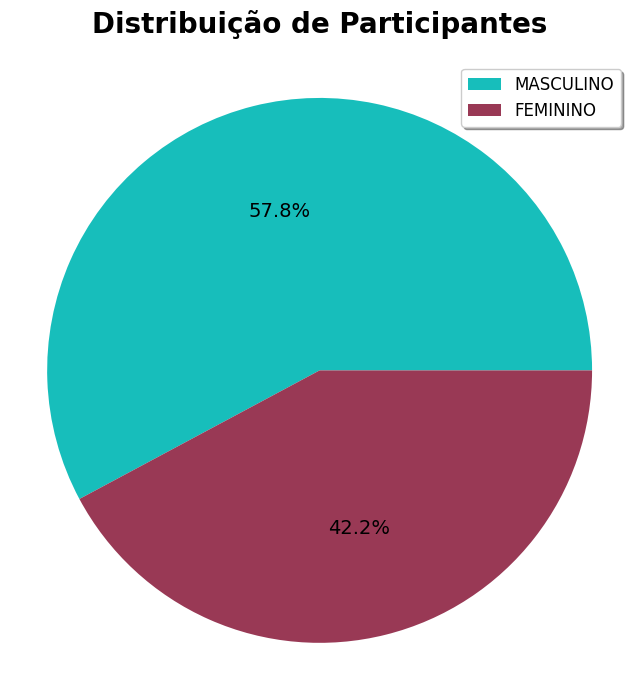

In [ ]:
import matplotlib.pyplot as plt # Importando biblioteca para construir visualizações(gráficos)
import numpy as np # Importando biblioteca para manipular arrays e matrizes

# Criando um figura:
fig, ax = plt.subplots(1,1,figsize=(7,7))

# Plotando um gráfico de setores/pizza referente a quantidade de participantes do exame de cada gênero:
plt.pie(dataset["Genero"].value_counts(),labeldistance=1.05,textprops={"fontsize": 14},autopct="%1.1f%%",radius=1.1,colors=["#17BEBB","#993955"])
plt.title("Distribuição de Participantes",pad=20,fontweight="bold", size=20)
plt.legend(["MASCULINO", "FEMININO"],loc="upper right",fontsize=12,frameon=True,shadow=True)
plt.tight_layout()
plt.show()

# 2º - ANÁLISE (HORAS DE SONO)

In [ ]:
# Gerando DataFrame com os top 10 maiores pontuadores:
dataset_top10_total = dataset.sort_values(by="Pontuacao_Final", ascending=False).head(10)

In [ ]:
# Gerando estatísticas totais:
info = dataset["Horas_Sono"].describe()

# Selecionando medidas:
info[["count","mean","std","max","min"]]

,Horas_Sono
count,6378.000000
mean,7.034964
std,1.468033
max,10.000000
min,4.000000


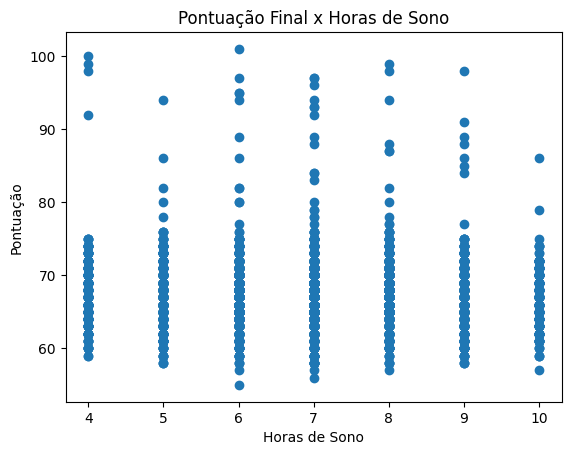

In [ ]:
#Gerando um gráfico de dispersão para analisar a influencia das horas de sono e a pontuação:

import matplotlib.pyplot as plt # Importando biblioteca para construir visualizações(gráficos)
import numpy as np # Importando biblioteca para manipular arrays e matrizes

# Convertendo para numpy arrays:
x = np.array(dataset["Horas_Sono"])
y = np.array(dataset["Pontuacao_Final"])

# Gerando um gráfico de dispersão com os pontos x(s) e y(s):
plt.scatter(x,y)
plt.title("Pontuação Final x Horas de Sono")
plt.xlabel("Horas de Sono")
plt.ylabel("Pontuação")
plt.show()

In [ ]:
# Analisando agora apenas os top 10 pontuadores:
info = dataset_top10_total["Horas_Sono"].describe()

# Selecionando medidas:
info[["count","mean","std","max","min"]]

,Horas_Sono
count,10.000000
mean,6.300000
std,1.828782
max,9.000000
min,4.000000


In [ ]:
# Visualizando o DataFrame com os top 10 pontuadores:
display(dataset_top10_total[["Horas_Sono","Pontuacao_Final"]].reset_index(drop=True))

,Horas_Sono,Pontuacao_Final
0,6,101
1,4,100
2,8,99
3,4,99
4,8,98
5,4,98
6,9,98
7,7,97
8,6,97
9,7,97


# 3º - ANÁLISE (HORAS DE ESTUDO)

In [ ]:
# Analisando estatísticas gerais:
dataset["Horas_Estudo"].describe()[["mean","std","max","min"]]

,Horas_Estudo
mean,19.977109
std,5.985460
max,44.000000
min,1.000000


Correlação de Pearson: 0.44510414026511724


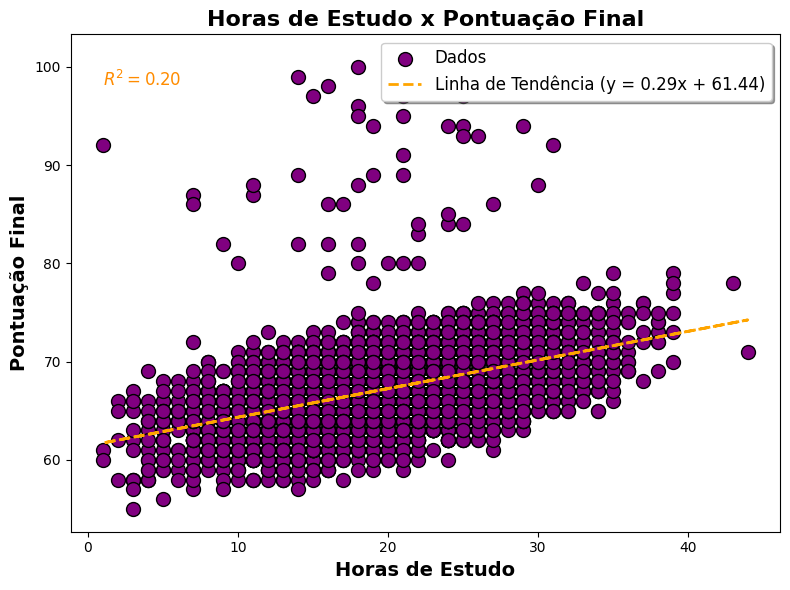

In [ ]:
import numpy as np # Importando biblioteca para manipular arrays e matrizes
import matplotlib.pyplot as plt # Importando biblioteca para construir visualizações(gráficos)
from sklearn.metrics import r2_score # Importando método que calcula o R² (medida que representa quanto da variação de Y é explicado pela variação de X)

# Convertendo para numpy arrays:
x = np.array(dataset["Horas_Estudo"])
y = np.array(dataset["Pontuacao_Final"])

# Calculando a corerelação entre os pontos:
correlacao = np.corrcoef(x, y)[0, 1]
print(f"Correlação de Pearson: {correlacao}")

# Calculando os coeficientes da linha de tendência (y = mx + b):
m, b = np.polyfit(x, y, 1)
y_pred = m * x + b

# Calculando o R²
r2 = r2_score(y, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="purple", label="Dados", edgecolor="k", s=100)

# Adicionando a linha de tendência
plt.plot(x, y_pred, color="orange", linestyle="--", linewidth=2, label=f"Linha de Tendência (y = {m:.2f}x + {b:.2f})")

# Personalizando o título e os eixos
plt.title("Horas de Estudo x Pontuação Final", fontsize=16, fontweight="bold")
plt.xlabel("Horas de Estudo", fontsize=14, fontweight="bold")
plt.ylabel("Pontuação Final", fontsize=14, fontweight="bold")

# Adicionando o valor de R² ao gráfico
plt.text(1, max(y) - 3, f"$R^2 = {r2:.2f}$", fontsize=12, color="#FF8C00", fontweight="bold")
plt.legend(loc="upper right", fontsize=12, frameon=True, shadow=True)
plt.tight_layout()
plt.show()

# 4º - ANÁLISE (TIPO DE ESCOLA)

In [ ]:
# Visualizando DataFrame:
dataset["Tipo_Escola"].value_counts()

,count
Tipo_Escola,
Public,4434
Private,1944


In [ ]:
# Verificado a quantidade de elementos, vamos separar o conjunto em dois de acordo com o tipo de ensino:

dataset_publica = dataset[dataset["Tipo_Escola"] == "Public"]

dataset_privada = dataset[dataset["Tipo_Escola"] == "Private"]

In [ ]:
# Verificando as médias dos alunos de tipos de ensinos diferentes:
dataset[["Tipo_Escola", "Horas_Sono", "Horas_Estudo", "Atividade_Fisica"]].groupby("Tipo_Escola").mean()

,Horas_Sono,Horas_Estudo,Atividade_Fisica
Tipo_Escola,,,
Private,7.033436,19.966564,2.985082
Public,7.035634,19.981732,2.967298


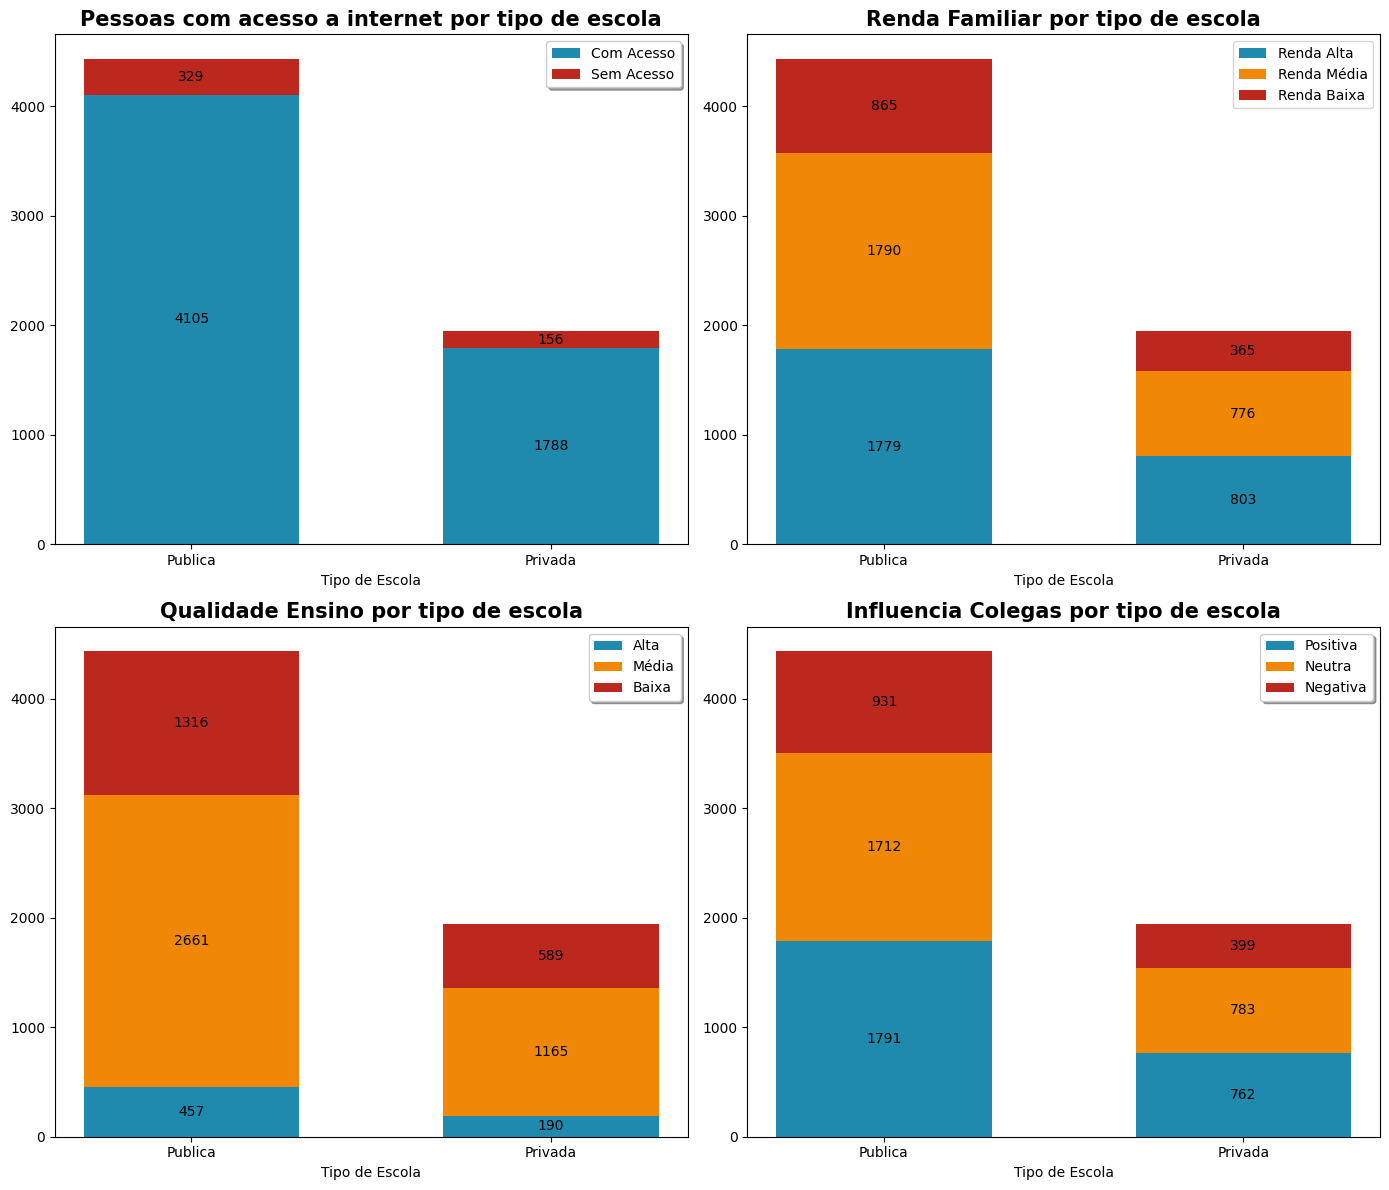

In [ ]:
import matplotlib.pyplot as plt # Importando biblioteca para construir visualizações(gráficos)
import numpy as np # Importando biblioteca para manipular arrays e matrizes

# Gerando uma figura com 4 axes:
fig, axes = plt.subplots(2,2,figsize=(14,12))

# Gerando um array com os tipos de escola:
escola = ["Publica","Privada"]

acesso_net = {
    "Yes": np.array([
        dataset_publica["Acesso_Internet"].value_counts().loc["Yes"],
        dataset_privada["Acesso_Internet"].value_counts().loc["Yes"]
    ]),
    "No": np.array([
        dataset_publica["Acesso_Internet"].value_counts().loc["No"],
        dataset_privada["Acesso_Internet"].value_counts().loc["No"]
    ])
}

renda_fam = {"Low":np.array([dataset_publica["Renda_Familiar"].value_counts().loc["Low"],
                             dataset_privada["Renda_Familiar"].value_counts().loc["Low"]]),

             "Medium":np.array([dataset_publica["Renda_Familiar"].value_counts().loc["Medium"],
                                dataset_privada["Renda_Familiar"].value_counts().loc["Medium"]]),

             "High":np.array([dataset_publica["Renda_Familiar"].value_counts().loc["High"],
                              dataset_privada["Renda_Familiar"].value_counts().loc["High"]])}
influencia_colegas = {
    "Positive": np.array([
        dataset_publica["Influencia_Colegas"].value_counts().loc["Positive"],
        dataset_privada["Influencia_Colegas"].value_counts().loc["Positive"]
    ]),
    "Neutral": np.array([
        dataset_publica["Influencia_Colegas"].value_counts().loc["Neutral"],
        dataset_privada["Influencia_Colegas"].value_counts().loc["Neutral"]
    ]),
    "Negative":np.array([dataset_publica["Influencia_Colegas"].value_counts().loc["Negative"],
                         dataset_privada["Influencia_Colegas"].value_counts().loc["Negative"]
    ])}

qualidade_ensino = {
    "Low": np.array([
        dataset_publica["Qualidade_Ensino"].value_counts().loc["Low"],
        dataset_privada["Qualidade_Ensino"].value_counts().loc["Low"]
    ]),
    "Medium": np.array([
        dataset_publica["Qualidade_Ensino"].value_counts().loc["Medium"],
        dataset_privada["Qualidade_Ensino"].value_counts().loc["Medium"]
    ]),
    "High":np.array([
        dataset_publica["Qualidade_Ensino"].value_counts().loc["High"],
        dataset_privada["Qualidade_Ensino"].value_counts().loc["High"]
    ])}

# Gráfico de barras - (Acesso Internet)
bottom = 0
for sex, sex_count in acesso_net.items():
    p = axes[0,0].bar(escola, sex_count, 0.6, label=sex, bottom=bottom, color = '#208AAE' if sex == "Yes" else '#BD281E' )
    bottom += sex_count

    axes[0,0].bar_label(p, label_type='center')

axes[0,0].set_title('Pessoas com acesso a internet por tipo de escola',fontweight='bold',size=15)
axes[0,0].set_xlabel('Tipo de Escola')
axes[0,0].legend(["Com Acesso","Sem Acesso"],loc="upper right",fontsize=10,frameon=True,shadow=True)

# Gráfico de barras - (Renda Familiar)
bottom = 0
for sex, sex_count in renda_fam.items():
    p = axes[0,1].bar(escola, sex_count, 0.6, label=sex, bottom=bottom,  color = "#BD281E" if sex == "High" else "#F18805" if sex == "Medium" else "#208AAE")

    axes[0,1].bar_label(p, label_type='center')
    bottom += sex_count


axes[0,1].set_title('Renda Familiar por tipo de escola',fontweight='bold',size=15)
axes[0,1].set_xlabel('Tipo de Escola')
axes[0,1].legend(["Renda Alta","Renda Média","Renda Baixa"])

# Gráfico de barras - (Influencia Colegas)
bottom = 0
for sex, sex_count in influencia_colegas.items():
    p = axes[1,1].bar(escola, sex_count, 0.6, label=sex, bottom=bottom,color = "#208AAE" if sex == "Positive" else "#F18805" if sex == "Neutral" else "#BD281E")
    bottom += sex_count
    axes[1,1].bar_label(p, label_type='center')

axes[1,1].set_title('Influencia Colegas por tipo de escola',fontweight='bold',size=15)
axes[1,1].set_xlabel('Tipo de Escola')
axes[1,1].legend(["Positiva","Neutra","Negativa"],loc="upper right",fontsize=10,frameon=True,shadow=True)

# Gráfico de barras - (Qualidade Ensino)

bottom = 0
for sex, sex_count in qualidade_ensino.items():
    p = axes[1,0].bar(escola, sex_count, 0.6, label=sex, bottom=bottom,color = "#BD281E" if sex == "High" else "#F18805" if sex == "Medium" else "#208AAE")
    bottom += sex_count
    axes[1,0].bar_label(p, label_type='center')

axes[1,0].set_title('Qualidade Ensino por tipo de escola',fontweight='bold',size=15)
axes[1,0].set_xlabel('Tipo de Escola')
axes[1,0].legend(["Alta","Média","Baixa"],loc="upper right",fontsize=10,frameon=True,shadow=True)


plt.tight_layout()
plt.show()



# 5º - ANÁLISE (PRESENÇA AULAS)

Correlação de Pearson: 0.575290974941968


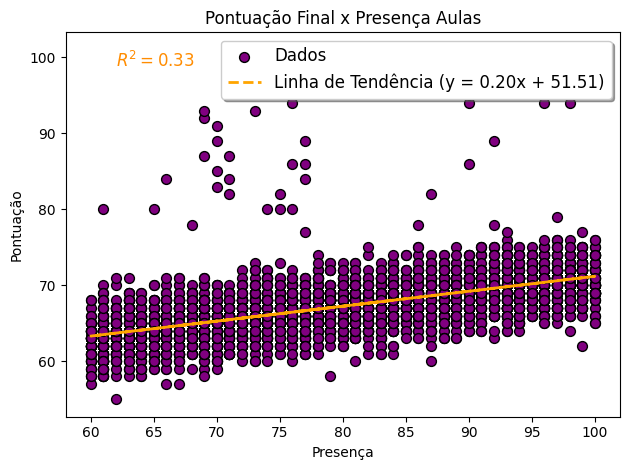

In [ ]:

import numpy as np # Importando biblioteca para manipular arrays e matrizes
import matplotlib.pyplot as plt # Importando biblioteca para construir visualizações(gráficos)
from sklearn.metrics import r2_score # Importando método que calcula o R² (medida que representa quanto da variação de Y é explicado pela variação de X)

# Definição dos dados
x = np.array(dataset_publica["Presenca"])
y = np.array(dataset_publica["Pontuacao_Final"])

# Calculando a correlação entre os pontos x(s) e y(s):
correlacao = np.corrcoef(x, y)[0, 1]
print(f"Correlação de Pearson: {correlacao}")

# Gráfico de dispersão
plt.scatter(x, y, color="purple", label="Dados", s=50,edgecolor="k")
plt.title("Pontuação Final x Presença Aulas")
plt.xlabel("Presença")
plt.ylabel("Pontuação")

# Regressão linear
m, b = np.polyfit(x, y, 1)
y_pred = m * x + b
r2 = r2_score(y, y_pred)

# Linha de tendência e anotação de R²
plt.plot(x, y_pred, color="orange", linestyle="--", linewidth=2,
         label=f"Linha de Tendência (y = {m:.2f}x + {b:.2f})")
plt.text(x.min() + (x.max() - x.min()) * 0.05,
         y.max() - (y.max() - y.min()) * 0.05, f"$R^2 = {r2:.2f}$",
         fontsize=12, color="#FF8C00", fontweight="bold")

# Ajustes finais
plt.legend(loc="upper right", fontsize=12, frameon=True, shadow=True)
plt.tight_layout()
plt.show()



# 6º - ANÁLISE (NÍVEL DE MOTIVAÇÃO)

In [ ]:
# Visualizando estatísticas da coluna "Pontuação Final" para o DataFrame original:
dataset["Pontuacao_Final"].describe()

,Pontuacao_Final
count,6378.000000
mean,67.252117
std,3.914217
min,55.000000
25%,65.000000
50%,67.000000
75%,69.000000
max,101.000000


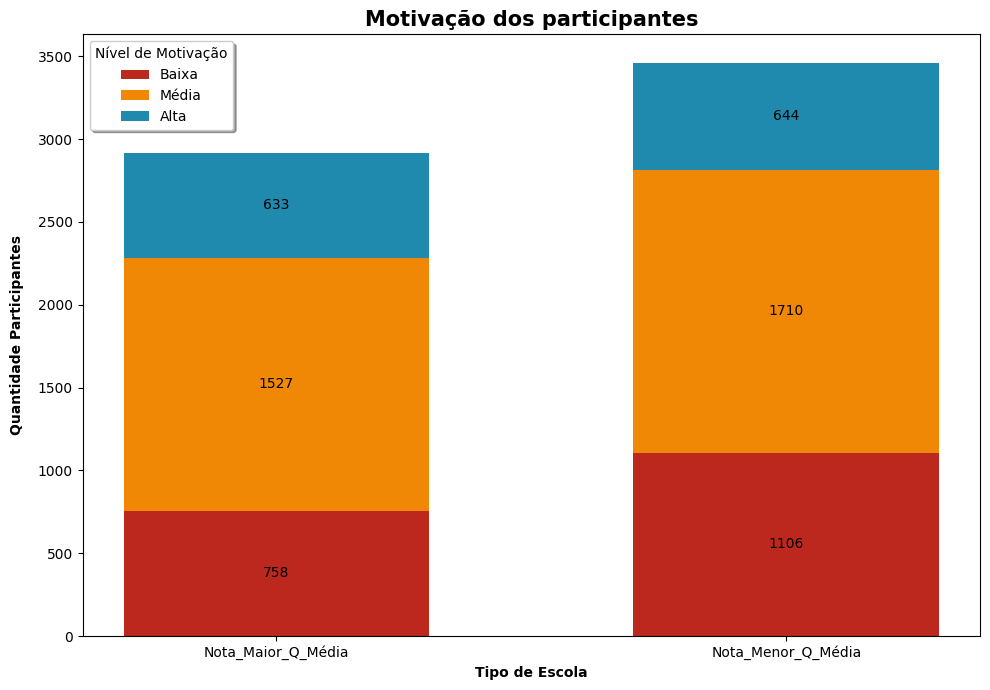

In [ ]:
import numpy as np # Importando biblioteca para manipular arrays e matrizes
import matplotlib.pyplot as plt # Importando biblioteca para construir visualizações(gráficos)


fig, ax = plt.subplots(1,1,figsize=(10,7))
tipo_nota = ["Nota_Maior_Q_Média","Nota_Menor_Q_Média"]

dataset_notamaior = dataset[dataset["Pontuacao_Final"] >= 67.25]
dataset_notamenor = dataset[dataset["Pontuacao_Final"] < 67.25]

motivacao = {
    "Low": np.array([
    dataset_notamaior["Nivel_Motivacao"].value_counts().loc["Low"],
    dataset_notamenor["Nivel_Motivacao"].value_counts().loc["Low"]]),

    "Medium": np.array([
    dataset_notamaior["Nivel_Motivacao"].value_counts().loc["Medium"],
    dataset_notamenor["Nivel_Motivacao"].value_counts().loc["Medium"]]),

    "High": np.array([
    dataset_notamaior["Nivel_Motivacao"].value_counts().loc["High"],
    dataset_notamenor["Nivel_Motivacao"].value_counts().loc["High"]])
}


# Gerando gráfico de barras:
bottom = 0
for sex, sex_count in motivacao.items():
    p = plt.bar(tipo_nota, sex_count, 0.6, label=sex, bottom=bottom,color = "#BD281E" if sex == "Low" else "#F18805" if sex == "Medium" else "#208AAE")
    bottom += sex_count
    plt.bar_label(p, label_type='center')

plt.title('Motivação dos participantes',fontweight='bold',size=15)
plt.xlabel('Tipo de Escola',fontweight = "bold")
plt.ylabel('Quantidade Participantes',fontweight = "bold", labelpad=10)
plt.legend(["Baixa","Média","Alta"], title="Nível de Motivação",loc="upper left",fontsize=10,frameon=True,shadow=True)
plt.tight_layout()
plt.show()

# 7º - ANÁLISE (150 MAIORES PONTUADORES)

In [ ]:
# Gerando o Dataframe dos top 150 maiores pontuadores:
dataset_top150 = dataset.sort_values(by="Pontuacao_Final", ascending=False).head(150)

# Gerando um visualização das médias e desvios padrões por coluna:
dataset_top150[["Horas_Estudo","Presenca","Horas_Sono","Atividade_Fisica"]].describe().loc[["mean","std"]]

,Horas_Estudo,Presenca,Horas_Sono,Atividade_Fisica
mean,26.326667,89.653333,6.840000,3.020000
std,7.203184,10.549968,1.390669,1.132023


In [ ]:
# Comparando agora com o data_set padrão:
dataset[["Horas_Estudo","Presenca","Horas_Sono","Atividade_Fisica"]].describe().loc[["mean","std"]]

,Horas_Estudo,Presenca,Horas_Sono,Atividade_Fisica
mean,19.977109,80.020853,7.034964,2.972719
std,5.985460,11.550723,1.468033,1.028926


In [ ]:
# Função de cálculo de porcentagem:
def calcula_porcentagem(*valores, total=150):
    porcentagens = []
    for valor in valores:
        porcentagem = (valor / total) * 100
        porcentagens.append(round(porcentagem, 2))
    return porcentagens

In [ ]:
# Selecionando a quantidade de valores por categoria:
nivel_motivacao_top150 = dataset_top150["Nivel_Motivacao"].value_counts().loc[["Low", "Medium", "High"]]

# Aplicando a função sobre os dados:
porcentagens_top150 = calcula_porcentagem(*nivel_motivacao_top150)

# Exibindo os resultados:
print(f"Motivação Baixa: {porcentagens_top150[0]}% / Motivação Média: {porcentagens_top150[1]}% / Motivação Alta: {porcentagens_top150[2]}%")

Motivação Baixa: 22.0% / Motivação Média: 47.33% / Motivação Alta: 30.67%


In [ ]:
# Selecionando a quantidade de valores por categoria:
renda_familiar_top150 = dataset_top150["Renda_Familiar"].value_counts().loc[["Low", "Medium", "High"]]

# Aplicando a função sobre os dados:
porcentagens_top150 = calcula_porcentagem(*renda_familiar_top150)

# Exibindo os resultados:
print(f"Renda Familiar Baixa: {porcentagens_top150[0]}% / Renda Familiar Média: {porcentagens_top150[1]}% / Renda Familiar Alta: {porcentagens_top150[2]}%")

Renda Familiar Baixa: 35.33% / Renda Familiar Média: 38.67% / Renda Familiar Alta: 26.0%


In [ ]:
# Selecionando a quantidade de valores por categoria:
qualidade_ensino_top150 = dataset_top150["Qualidade_Ensino"].value_counts().loc[["Low", "Medium", "High"]]

# Aplicando a função sobre os dados:
porcentagens_top150 = calcula_porcentagem(*qualidade_ensino_top150)

# Exibindo os resultados:
print(f"Qualidade de Ensino Baixa: {porcentagens_top150[0]}% / Qualidade de Ensino Média: {porcentagens_top150[1]}% / Qualidade de Ensino Alta: {porcentagens_top150[2]}%")

Qualidade de Ensino Baixa: 6.67% / Qualidade de Ensino Média: 52.67% / Qualidade de Ensino Alta: 40.67%


In [ ]:
# Selecionando a quantidade de valores por categoria:
acesso_internet_top150 = dataset_top150["Acesso_Internet"].value_counts().loc[["Yes", "No"]]

# Aplicando a função sobre os dados:
porcentagens_top150 = calcula_porcentagem(*acesso_internet_top150)

# Exibindo os resultados:
print(f"Acesso a Internet: {porcentagens_top150[0]}% / Sem Acesso a Internet: {porcentagens_top150[1]}%")

Acesso a Internet: 93.33% / Sem Acesso a Internet: 6.67%


In [ ]:
# Selecionando a quantidade de valores por categoria:
influencia_colegas_top150 = dataset_top150["Influencia_Colegas"].value_counts().loc[["Positive", "Neutral", "Negative"]]

# Aplicando a função sobre os dados:
porcentagens_top150 = calcula_porcentagem(*influencia_colegas_top150)

# Exibindo os resultados:
print(f"Influência Positiva: {porcentagens_top150[0]}% / Influência Neutra: {porcentagens_top150[1]}% / Influência Negativa: {porcentagens_top150[2]}%")

Influência Positiva: 47.33% / Influência Neutra: 37.33% / Influência Negativa: 15.33%


In [ ]:
# Selecionando a quantidade de valores por categoria:
tipo_escola_top150 = dataset_top150["Tipo_Escola"].value_counts().loc[["Public", "Private"]]

# Aplicando a função sobre os dados:
porcentagens_top150 = calcula_porcentagem(*tipo_escola_top150)

# Exibindo os resultados:
print(f"Participantes de escola publica: {porcentagens_top150[0]}% / Paricipantes de escola particular: {porcentagens_top150[1]}%")

Participantes de escola publica: 70.0% / Paricipantes de escola particular: 30.0%


In [ ]:
# Selecionando a quantidade de valores por categoria:
Educacao_Pais_top150 = dataset_top150["Educacao_Pais"].value_counts().loc[["High School", "College", "Postgraduate"]]

# Aplicando a função sobre os dados:
porcentagens_top150 = calcula_porcentagem(*Educacao_Pais_top150)

# Exibindo os resultados:
print(f"High School: {porcentagens_top150[0]}% / College: {porcentagens_top150[1]}% / Postgraduate: {porcentagens_top150[2]}%")

High School: 42.0% / College: 32.0% / Postgraduate: 26.0%


# ANÁLISE DESEMPENHO

In [5]:
# Definindo função:
def classificar_valor(valor):
    if valor > 0:
        return 'nota_aumentou'
    elif valor < 0:
        return 'nota_diminuiu'
    else:
        return 'nota_manteve'

In [6]:
dataset["Diferenca"] = dataset["Pontuacao_Final"] - dataset["Pontuacao_Anterior"]
dataset["Diferenca"] = dataset["Diferenca"].map(classificar_valor)
dataset["Diferenca"].value_counts()

Diferenca
nota_diminuiu    4177
nota_aumentou    2073
nota_manteve      128
Name: count, dtype: int64

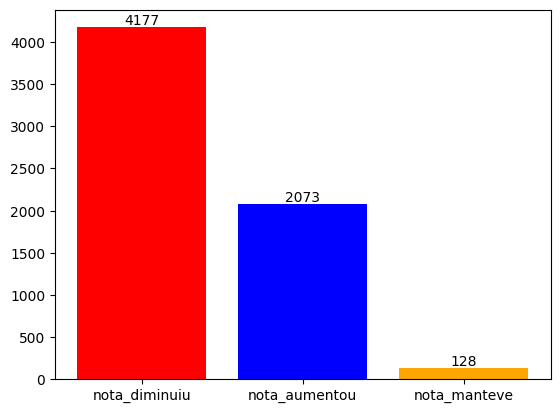

In [7]:
import matplotlib.pyplot as plt # Importando biblioteca para construir visualizações(gráficos)

value_counts = dataset["Diferenca"].value_counts()

# Gerando gráfico de barras
plt.bar(value_counts.index, value_counts.values, color=["red", "blue", "orange"])

# Adicionar os valores em cima das barras
for i, value in enumerate(value_counts.values):
    plt.text(value_counts.index[i], value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

# Mostrar o gráfico
plt.show()

In [8]:
# Calcular as médias para cada caso
media_aumentou = dataset[dataset["Diferenca"] == "nota_aumentou"]["Horas_Estudo"].mean()
media_diminuiu = dataset[dataset["Diferenca"] == "nota_diminuiu"]["Horas_Estudo"].mean()

# Exibir os resultados com formatação
print(f"Nota aumentou: {media_aumentou:.2f} horas de estudo em média.")
print(f"Nota diminuiu: {media_diminuiu:.2f} horas de estudo em média.")

Nota aumentou: 20.47 horas de estudo em média.
Nota diminuiu: 19.73 horas de estudo em média.


In [9]:
# Calcular as médias para cada caso
media_aumentou = dataset[dataset["Diferenca"] == "nota_aumentou"]["Presenca"].mean()
media_diminuiu = dataset[dataset["Diferenca"] == "nota_diminuiu"]["Presenca"].mean()

# Exibir os resultados com formatação
print(f"Nota aumentou: {media_aumentou:.2f}% presença.")
print(f"Nota diminuiu: {media_diminuiu:.2f}% presença.")

Nota aumentou: 82.12% presença.
Nota diminuiu: 78.97% presença.


In [10]:
nota_subiu = (((dataset[dataset["Diferenca"] == "nota_aumentou"]["Atividade_Extracurricular"].value_counts()).loc["Yes"])/2073)*100

nota_desce = (((dataset[dataset["Diferenca"] == "nota_diminuiu"]["Atividade_Extracurricular"].value_counts()).loc["Yes"])/4177)*100

print(f"Nota aumentou: {nota_subiu:.2f}% realiza atividades extracurriculares.")
print(f"Nota diminuiu: {nota_desce:.2f}% realiza atividades extracurriculares.")

Nota aumentou: 60.64% realiza atividades extracurriculares.
Nota diminuiu: 59.37% realiza atividades extracurriculares.
